In [1]:
import numpy
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
ctoi = {c: i+1 for i,c in enumerate(chars)}
ctoi['.'] = 0
N = torch.zeros((27, 27), dtype=torch.int32)
itoc = {i: c for c, i in ctoi.items()}

In [4]:
for w in words:
    chs = list(f".{w}.")
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

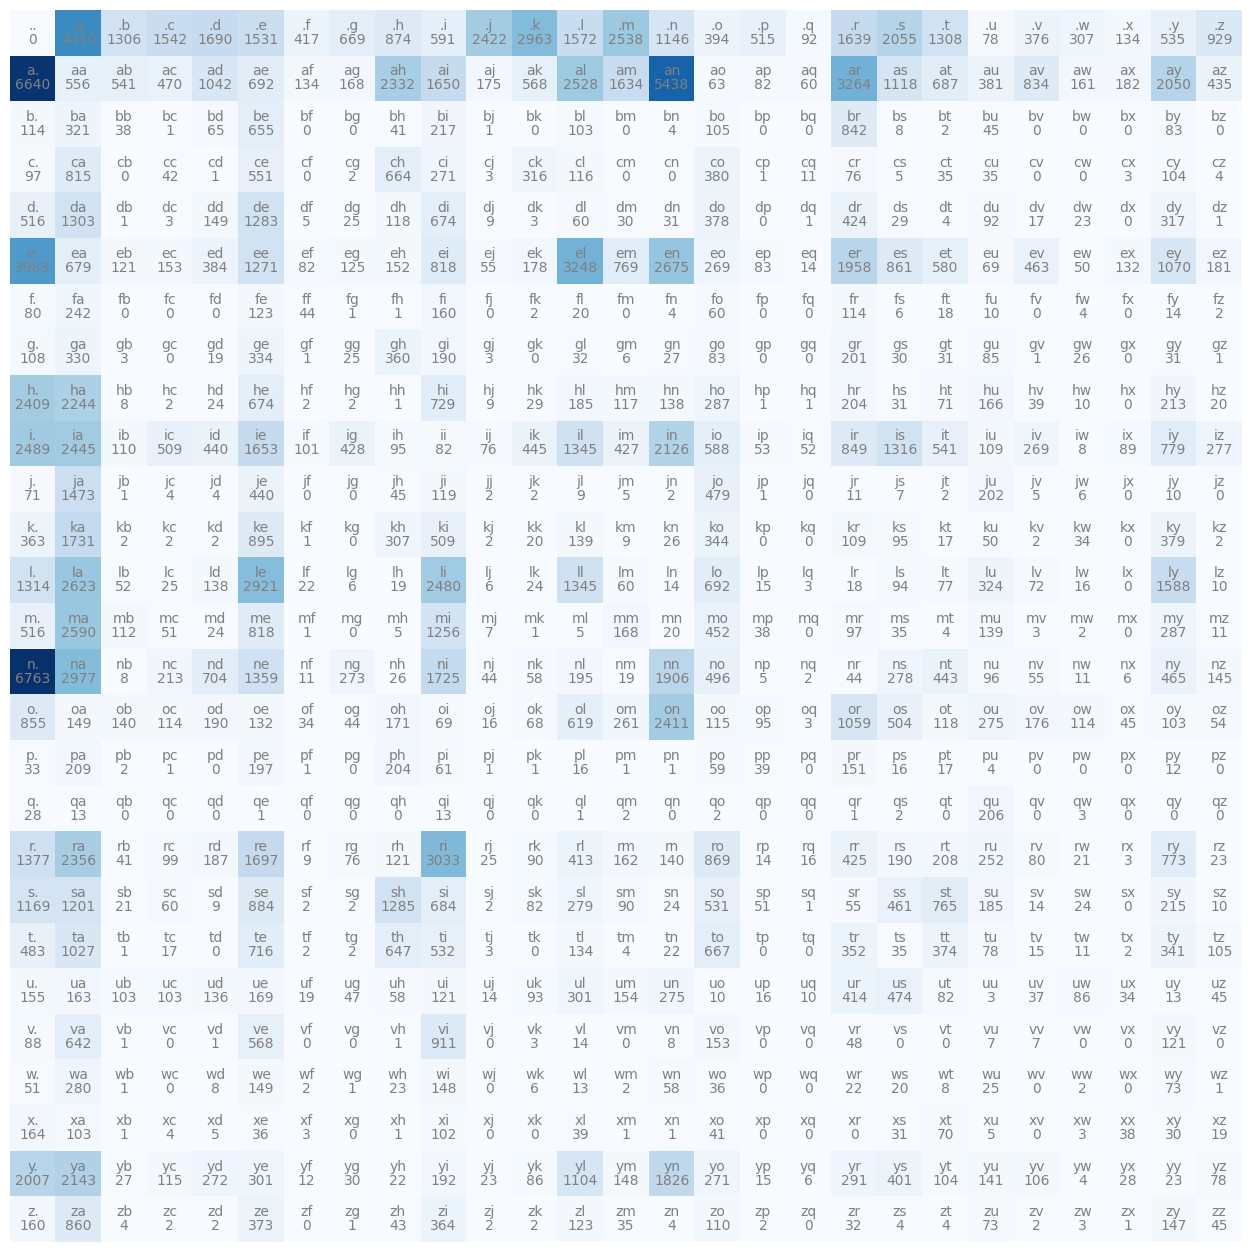

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j] # concat the letters itoc[i] and itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') # print the concatenated letters
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color='gray') # print the value of the N[i,j]
plt.axis('off')

In [6]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

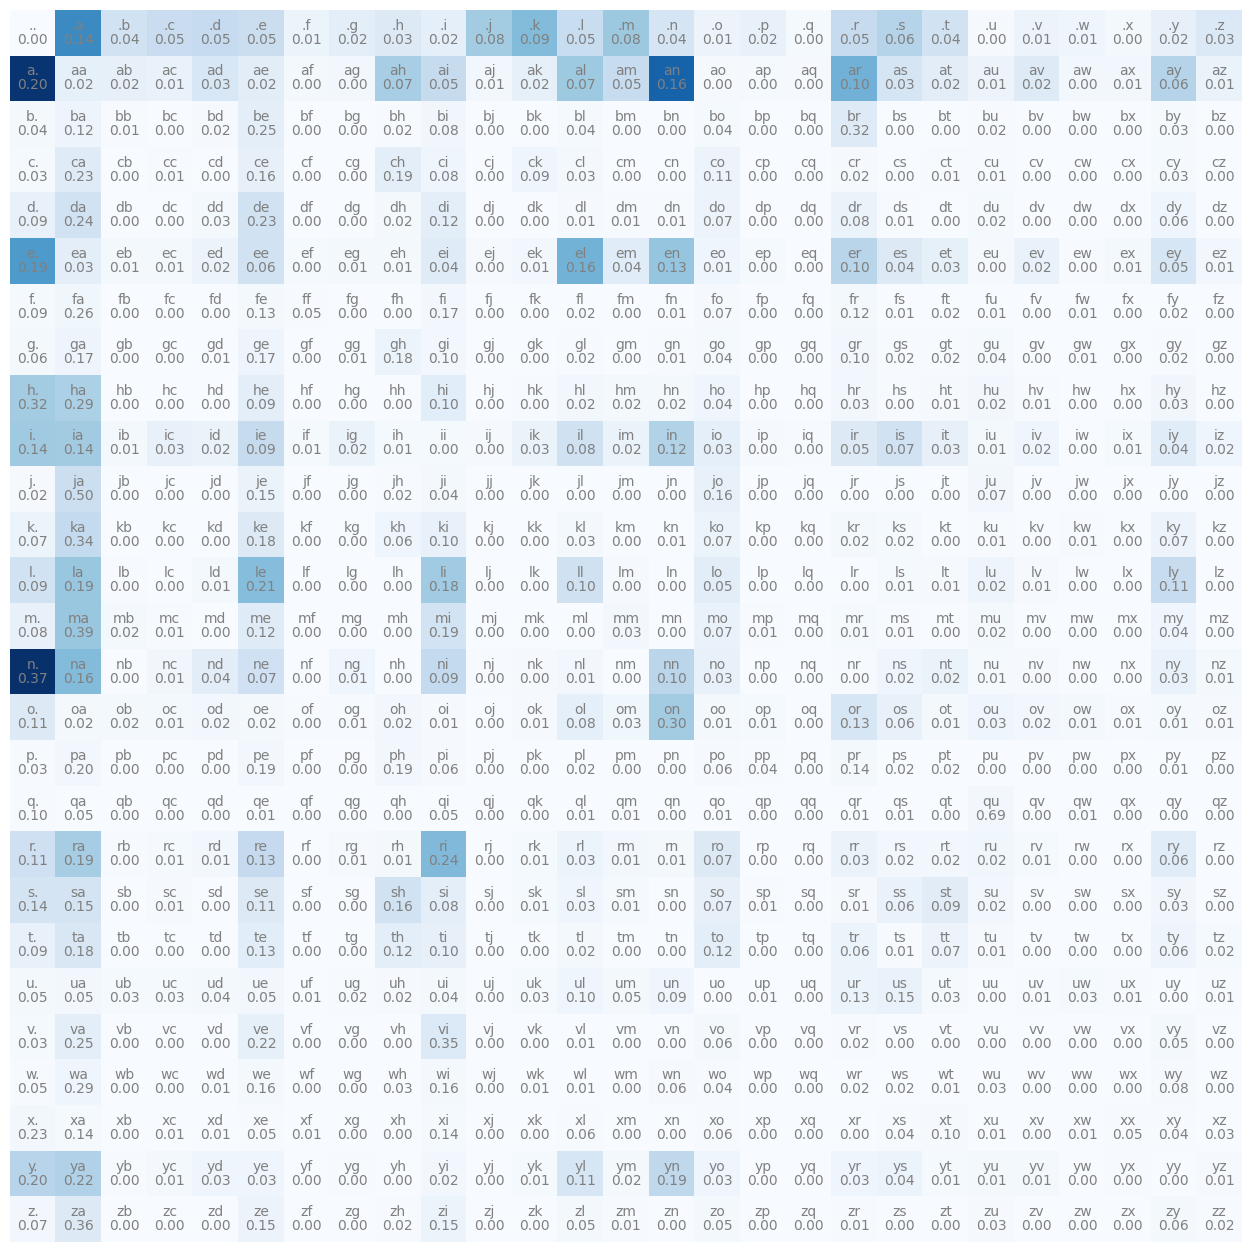

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j] # concat the letters itoc[i] and itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray') # print the concatenated letters
        plt.text(j, i, "{:.2f}".format(P[i,j].item()), ha="center", va="top", color='gray') # print the value of the N[i,j]
plt.axis('off')

In [8]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itoc[ix])
        if ix == 0:
            break
    print("".join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [9]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [10]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = ctoi[ch1]
        ix2 = ctoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")


log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [11]:
xs, ys = [], []
for w in words[:1]:
    chs = list(f".{w}.")
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(ctoi[ch1])
        ys.append(ctoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [12]:
xs

tensor([ 0,  5, 13, 13,  1])

In [13]:
ys

tensor([ 5, 13, 13,  1,  0])

In [14]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

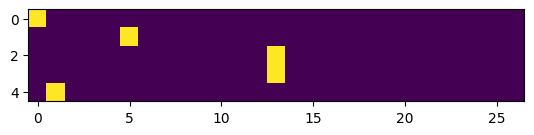

In [15]:
plt.imshow(xenc)

In [16]:
xenc.shape

torch.Size([5, 27])

In [17]:
W = torch.randn((27, 27))
xenc @ W # 5, 27 * 27, 27 = 5, 27

tensor([[ 1.6493e-01, -7.0035e-02,  1.2230e-01, -8.4221e-01,  1.9261e+00,
          4.0269e-01, -5.8508e-01, -1.7272e-01, -1.4216e-04, -7.2449e-01,
          1.1575e-01, -2.4541e+00, -1.1233e+00,  1.0089e+00,  9.8681e-01,
         -4.1085e-01,  1.2354e+00, -3.4616e-01, -1.8412e+00,  1.7072e+00,
         -3.1452e-01, -2.2157e-01,  2.3134e-01, -6.1884e-01,  2.3146e-01,
         -4.2379e-01,  8.7675e-01],
        [ 1.6796e-01,  2.0232e+00, -6.6667e-01,  9.8240e-01,  1.0386e+00,
         -1.4195e+00, -6.2729e-02,  1.3010e+00, -5.7451e-01, -3.0316e-01,
         -7.9049e-01, -3.6116e-01, -9.0328e-01,  5.4501e-01,  1.9151e+00,
          5.1177e-01, -7.5831e-01, -3.8077e-02,  1.0942e+00, -1.8804e+00,
         -1.2087e+00,  5.7784e-01,  1.6688e+00,  8.5125e-02,  1.2034e+00,
         -1.5661e+00, -6.9564e-03],
        [ 2.6592e-01, -1.0932e+00, -1.8014e-01, -7.2993e-02, -1.0959e+00,
         -7.9688e-02,  1.6959e+00, -6.5571e-01, -9.8888e-01, -1.8175e+00,
          3.5146e-01,  9.2514e-01,  7.65

In [18]:
logits = xenc @ W # Log counts? - why is this log counts?
counts = logits.exp() # Equivlent to N
probs = counts / counts.sum(1, keepdim=True)

In [19]:
probs

tensor([[0.0295, 0.0233, 0.0282, 0.0108, 0.1716, 0.0374, 0.0139, 0.0210, 0.0250,
         0.0121, 0.0281, 0.0021, 0.0081, 0.0686, 0.0671, 0.0166, 0.0860, 0.0177,
         0.0040, 0.1378, 0.0183, 0.0200, 0.0315, 0.0135, 0.0315, 0.0164, 0.0601],
        [0.0236, 0.1506, 0.0102, 0.0532, 0.0562, 0.0048, 0.0187, 0.0731, 0.0112,
         0.0147, 0.0090, 0.0139, 0.0081, 0.0343, 0.1351, 0.0332, 0.0093, 0.0192,
         0.0595, 0.0030, 0.0059, 0.0355, 0.1056, 0.0217, 0.0663, 0.0042, 0.0198],
        [0.0336, 0.0086, 0.0215, 0.0239, 0.0086, 0.0238, 0.1403, 0.0134, 0.0096,
         0.0042, 0.0366, 0.0649, 0.0553, 0.0541, 0.0156, 0.0612, 0.0342, 0.0161,
         0.0390, 0.0294, 0.0078, 0.1200, 0.0082, 0.0788, 0.0464, 0.0079, 0.0373],
        [0.0336, 0.0086, 0.0215, 0.0239, 0.0086, 0.0238, 0.1403, 0.0134, 0.0096,
         0.0042, 0.0366, 0.0649, 0.0553, 0.0541, 0.0156, 0.0612, 0.0342, 0.0161,
         0.0390, 0.0294, 0.0078, 0.1200, 0.0082, 0.0788, 0.0464, 0.0079, 0.0373],
        [0.1943, 0.0172,

In [20]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [21]:
xenc = F.one_hot(xs, num_classes=27).float() # Single input to the neural network
logits = xenc @ W # predict log counts
counts = logits.exp() # counts, Equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next char
# Last two lines are called softmax


In [22]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("------------------------------------")
    print(f"bigram example {i+1}: {itoc[x]}{itoc[y]} (indexes {x}, {y})")
    print(f"input to the neural net: {x}")
    print(f"output probabilities from the neural net: {probs[i]}")
    p = probs[i, y]
    print(f"probability asignd by the neural net to the correct char: {p}")
    logp = torch.log(p)
    print(f"log likelihood: {logp}")
    nll = -logp
    print(f"negative log likelihood: {nll}")
    nlls[i] = nll

print("=========================================")
print(f"average negative loglikelihood: {nlls.mean().item()}")


------------------------------------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
probability asignd by the neural net to the correct char: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
------------------------------------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
probability asignd by the neural net to the correct char: 0.01805070042610168

In [23]:
xs, ys = [], []
for word in words:
    chs = list(f".{word}.")
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(ctoi[ch1])
        ys.append(ctoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"Number of examples: {num}")

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

Number of examples: 228146


In [24]:
for k in range(30):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding of the ctoi idx. dim: 1x27
    logits = xenc @ W # forward pass. dim: 1x27 @ 27x27 = 1x27
    counts = logits.exp() # counts
    probs = counts / counts.sum(1, keepdim=True) # probabilities for next char
    loss = -probs[torch.arange(num), ys].log().mean() 
    print(f"loss: {loss.item()}")

    #backward pass:
    W.grad = None # set zero to the current gradiant.
    loss.backward()
    # Update
    W.data += -10 * W.grad

loss: 3.758953809738159
loss: 3.670258045196533


loss: 3.5911526679992676
loss: 3.5200154781341553
loss: 3.4557929039001465
loss: 3.397714853286743
loss: 3.3451619148254395
loss: 3.297589063644409
loss: 3.254483938217163
loss: 3.215353488922119
loss: 3.179732322692871
loss: 3.147188663482666
loss: 3.1173393726348877
loss: 3.089850664138794
loss: 3.0644423961639404
loss: 3.0408775806427
loss: 3.018958568572998
loss: 2.9985179901123047
loss: 2.9794158935546875
loss: 2.961529016494751
loss: 2.9447526931762695
loss: 2.9289920330047607
loss: 2.9141640663146973
loss: 2.900193214416504
loss: 2.887012243270874
loss: 2.874558448791504
loss: 2.862776279449463
loss: 2.851613998413086
loss: 2.841024160385132
loss: 2.830965995788574


In [25]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # prediction for log counts
        counts = logits.exp() # counts
        p = counts / counts.sum(1, keepdim=True) # probabilities for next char by the model
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itoc[ix])
        if ix == 0:
            break
    print(''.join(out))

dexzmalegllusaroczktxh.
mpozistttwin.
lgdan.
ka.
da.


In [37]:
# E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. 
# Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

xs, ys = [], []
for w in words:
    chs = list(f"..{w}.")
    for i in range(len(chs)-2):
        ix1, ix2, y1 = ctoi[chs[i]], ctoi[chs[i+1]], ctoi[chs[i+2]]
        xs.append([ix1, ix2])
        ys.append(y1)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [27]:
print(xs.shape)
print(ys.shape)

torch.Size([228146, 2])
torch.Size([228146])


In [38]:
num_elements = len(xs)
contexts = xs[:, 0] * 27 + xs[:, 1] # Index into a flatten 27*27 = 0,...,728 sequence of numbers.
xenc = F.one_hot(contexts, num_classes=27*27).float()
xenc[1] 

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [39]:

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

In [ ]:
for _ in range(300):
    logits = xenc @ W
    counts = logits.exp() # softmax step 1
    probs = counts / counts.sum(1, keepdim=True) # softmax step 2
    loss = -probs[torch.arange(num_elements), ys].log().mean() + 0.01*(W**2).mean() # nll = (-1/n) * sum(log(probs)) + regularization

    print(f"Loss: {loss.item()}")

    # update
    W.grad = None    
    loss.backward()

    W.data += - 100 * W.grad

Loss: 2.669877290725708
Loss: 2.5879759788513184
Loss: 2.5163486003875732
Loss: 2.474855661392212
Loss: 2.4694206714630127
Loss: 2.4647939205169678
Loss: 2.460425853729248
Loss: 2.456360340118408
Loss: 2.4526467323303223
Loss: 2.4499735832214355
Loss: 2.4479527473449707
Loss: 2.4525318145751953
Loss: 2.4449658393859863
Loss: 2.458329200744629
Loss: 2.4340479373931885
Loss: 2.4365968704223633
Loss: 2.4328010082244873
Loss: 2.4474425315856934
Loss: 2.421274423599243
Loss: 2.4224987030029297
Loss: 2.420912504196167
Loss: 2.4355099201202393
Loss: 2.41041898727417
Loss: 2.412418842315674
Loss: 2.410600185394287
Loss: 2.425708532333374
Loss: 2.40036940574646
Loss: 2.402296304702759
Loss: 2.4010813236236572
Loss: 2.416287660598755
Loss: 2.3914716243743896
Loss: 2.393807888031006
Loss: 2.3925931453704834
Loss: 2.408095121383667
Loss: 2.3832685947418213
Loss: 2.38566255569458
Loss: 2.384768486022949
Loss: 2.4003889560699463
Loss: 2.375849723815918
Loss: 2.378483295440674
Loss: 2.377660751342773

KeyboardInterrupt: 

In [31]:
# Sampling
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out, ix1, ix2 = [] ,0, 0
  while True:
    ctx = torch.tensor([ix1 * 27 + ix2])
    xenc = F.one_hot(ctx, num_classes=27*27).float()
    logits = xenc @ W # prediction for log counts
    counts = logits.exp() # counts
    p = counts / counts.sum(1, keepdim=True) # probabilities for next char by the model
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoc[ix])
    if ix == 0:
      break
    ix1, ix2 = ix2, ix
  print(''.join(out))




cexzdfzjglkuriana.
kaydemmilistona.
noluwan.
ka.
da.


In [32]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)
for w in words:
    chs = list(f"..{w}.")
    for i in range(len(chs)-2):
        ix1, ix2, y1 = ctoi[chs[i]], ctoi[chs[i+1]], ctoi[chs[i+2]]
        N[ix1, ix2, y1]+=1

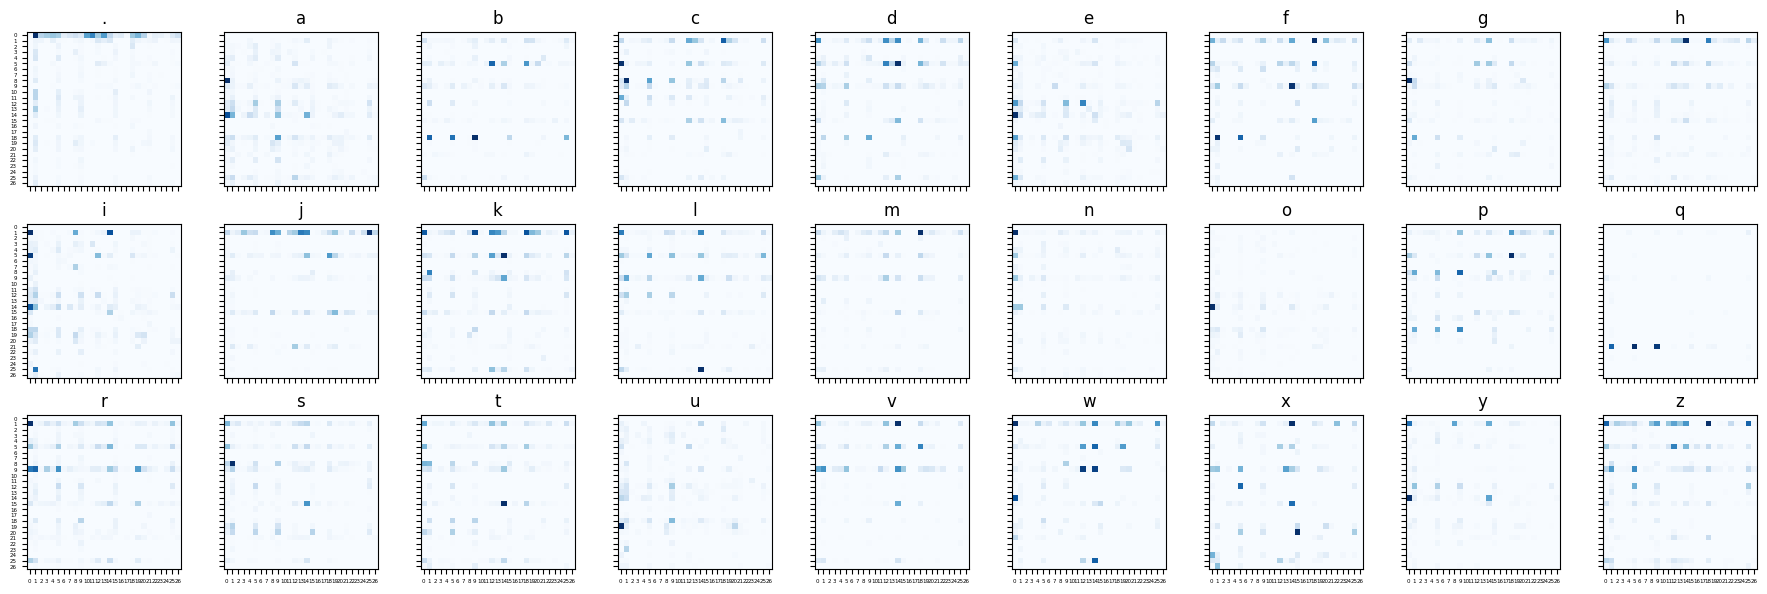

In [33]:
fig, axes = plt.subplots(3, 9, figsize=(18, 6), sharex=True, sharey=True)
for idx, ax in enumerate(axes.flat):
    if idx >= 27:
        ax.axis("off")
        continue
    mat = N[idx].float()
    ax.imshow(mat, cmap="Blues")
    ax.set_title(itoc[idx])
    ax.set_xticks(range(27))
    ax.set_yticks(range(27))
    ax.tick_params(labelsize=4)
plt.tight_layout()

In [34]:
P = (N+1).float() # laplace smoothing
P /= P.sum(2, keepdim=True)

In [35]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = list(f"..{w}.")
    for i in range(len(chs)-2):
        ix1, ix2, y1 = ctoi[chs[i]], ctoi[chs[i+1]], ctoi[chs[i+2]]
        prob = P[ix1, ix2, y1]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1

nll = -log_likelihood/n
print(f"{nll=}")

nll=tensor(2.2120)


In [36]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
  out = []
  ix1, ix2 = 0, 0
  while True:
    p = P[ix1, ix2]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoc[ix])
    if ix == 0:
      break
    ix1, ix2 = ix2, ix
  print(''.join(out))

ce.
bra.
jalius.
rochityharlonimittain.
luwak.
